In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "MetaCartel - MetaCartel Ventures"
SPLITS_FREQ = "W-THU"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-01-06"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-06-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071662
2019-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071537
2019-06-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071546
2019-06-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.070506
2019-07-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.069524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08,0.857143,0.428571,0.257143,0.128571,0.085714,0.012857,0.857143,0.947276,0.947276,0.947276,...,1.0,1.0,1.0,0.833333,1.0,1.0,1.0,1.0,1.0,0.123541
2023-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.081273
2023-06-22,1.000000,0.666667,0.400000,0.200000,0.133333,0.020000,0.500000,0.500000,0.500000,0.500000,...,1.0,1.0,1.0,0.500000,1.0,1.0,1.0,1.0,1.0,0.121736


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-06-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.072605
2019-06-13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.074815
2019-06-20,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.073784
2019-06-27,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.074108
2019-07-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.072410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08,1.0,0.428571,0.257143,0.128571,0.085714,0.012857,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.857143,1.0,1.0,1.0,1.0,1.0,0.127007
2023-06-15,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.119853
2023-06-22,1.0,0.500000,0.300000,0.150000,0.100000,0.015000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.750000,1.0,1.0,1.0,1.0,1.0,0.124992


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2019-06-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071662,openpop
2019-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071537,openpop
2019-06-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071546,openpop
2019-06-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.070506,openpop
2019-07-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.069524,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08,0.857143,0.428571,0.257143,0.128571,0.085714,0.012857,0.857143,0.947276,0.947276,0.947276,...,1.0,1.0,0.833333,1.0,1.0,1.0,1.0,1.0,0.123541,openpop
2023-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.081273,openpop
2023-06-22,1.000000,0.666667,0.400000,0.200000,0.133333,0.020000,0.500000,0.500000,0.500000,0.500000,...,1.0,1.0,0.500000,1.0,1.0,1.0,1.0,1.0,0.121736,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-11-11,5.0,60d,2021-11-11,0.002875,0.007175,52.0,20.0,42.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.107023,itemknn,test,NaN
2021-11-18,6.0,7d,2021-11-18,0.012567,0.001744,40.0,38.0,38.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.111969,itemknn,test,NaN
2021-11-25,15.0,90d,2021-11-25,0.001664,0.001728,9.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068863,itemknn,test,NaN
2021-12-02,15.0,90d,2021-12-02,0.001889,0.008949,8.0,6.0,7.500000,0.500000,0.333333,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.125764,itemknn,test,NaN
2021-12-09,2.0,21d,2021-12-09,0.012618,0.003486,9.0,6.0,7.500000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.108851,itemknn,test,NaN
2021-12-16,7.0,90d,2021-12-16,0.002058,0.003979,16.0,14.0,15.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.109972,itemknn,test,NaN
2021-12-23,1.0,7d,2021-12-23,0.005987,0.004103,16.0,13.0,14.333333,1.000000,0.444444,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.124939,itemknn,test,NaN
2021-12-30,3.0,7d,2021-12-30,0.005626,0.000737,10.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069829,itemknn,test,NaN
2022-01-06,15.0,90d,2022-01-06,0.001753,0.002529,7.0,7.0,7.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.112714,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-11-11,5.0,60d,2021-11-11,0.002875,0.007175,52.0,20.0,42.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.107023,itemknn,test,NaN
2021-11-18,6.0,7d,2021-11-18,0.012567,0.001744,40.0,38.0,38.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.111969,itemknn,test,NaN
2021-11-25,15.0,90d,2021-11-25,0.001664,0.001728,9.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068863,itemknn,test,NaN
2021-12-02,15.0,90d,2021-12-02,0.001889,0.008949,8.0,6.0,7.500000,0.500000,0.333333,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.125764,itemknn,test,NaN
2021-12-09,2.0,21d,2021-12-09,0.012618,0.003486,9.0,6.0,7.500000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.108851,itemknn,test,NaN
2021-12-16,7.0,90d,2021-12-16,0.002058,0.003979,16.0,14.0,15.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.109972,itemknn,test,NaN
2021-12-23,1.0,7d,2021-12-23,0.005987,0.004103,16.0,13.0,14.333333,1.000000,0.444444,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.124939,itemknn,test,NaN
2021-12-30,3.0,7d,2021-12-30,0.005626,0.000737,10.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069829,itemknn,test,NaN
2022-01-06,15.0,90d,2022-01-06,0.001753,0.002529,7.0,7.0,7.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.112714,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

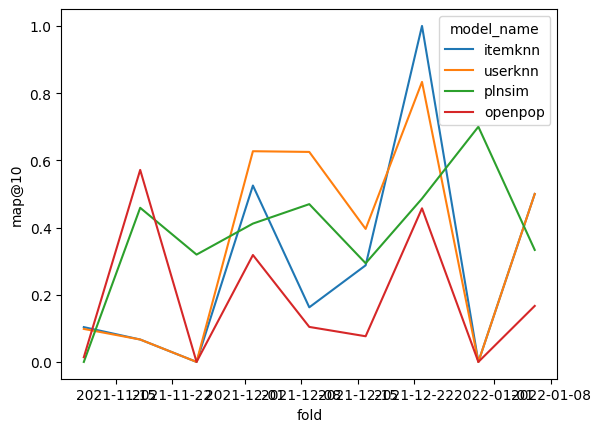

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2021-11-04,5,60d,2021-11-04,0.001139,0.006408,18,8.0,14.250000,0.5,0.166667,0.200000,0.225000,...,0.95,1.0,1.0,0.266667,0.266667,0.366667,0.366667,0.366667,0.366667,0.127026
2021-11-11,6,7d,2021-11-11,0.006505,0.003531,52,24.0,35.000000,0.0,0.333333,0.200000,0.100000,...,0.50,1.0,1.0,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.121119
2021-11-18,15,90d,2021-11-18,0.001766,0.007915,40,38.0,39.600000,0.8,0.400000,0.240000,0.140000,...,1.00,1.0,1.0,1.000000,0.933333,0.933333,0.933333,0.933333,0.933333,0.125768
2021-11-25,15,90d,2021-11-25,0.001664,0.001728,9,NaN,NaN,0.0,0.000000,0.000000,0.000000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068863
2021-12-02,2,21d,2021-12-02,0.002901,0.005508,8,6.0,7.250000,0.5,0.333333,0.300000,0.150000,...,1.00,1.0,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.125615
2021-12-09,7,90d,2021-12-09,0.015212,0.005431,9,6.0,7.500000,0.5,0.333333,0.200000,0.100000,...,1.00,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121633
2021-12-16,1,7d,2021-12-16,0.014991,0.001889,16,14.0,14.000000,0.0,0.333333,0.200000,0.100000,...,1.00,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.117991
2021-12-23,3,7d,2021-12-23,0.005087,0.004066,16,13.0,14.333333,1.0,0.444444,0.266667,0.133333,...,1.00,1.0,1.0,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.124755
2021-12-30,15,90d,2021-12-30,0.001653,0.001638,10,NaN,NaN,0.0,0.000000,0.000000,0.000000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068647
